## Описание датасета:
Данные были получены в ходе опроса учащихся по курсам математики и португальского языка в средней школе. В нем содержится много интересной социальной, гендерной и учебной информации о студентах

### Атрибуты

- school - школа ("GP" - Габриэль Перейра или "MS" - Мусиньу да Сильвейра)
- sex - пол ('F' - женский или 'M' - мужской)
- age - возраст учащегося (числовой: от 15 до 22 лет)
- address - тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
- famsize - размер семьи ('LE3' - меньше или равно 3 или 'GT3' - больше 3)
- Pstatus - Статус сожительства родителей ('T' - совместное проживание или 'A' - раздельное проживание)
- Medu - образование матери (численно: 0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 классы, 3 - среднее или 4 - высшее)
- Fedu - образование отца (численно: 0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 классы, 3 - среднее или 4 - высшее)
- Mjob - работа матери ('teacher', 'health', 'services', 'at_home' или 'other')
- Fjob - работа отца ('teacher', 'health', 'services', 'at_home' или 'other')
- reason - причина выбора школы (близость к дому 'home', репутатция школы 'reputation', 'course' предпочтения или 'other')
- guardian - опекун ученика ('mother', 'father' или 'other')
- traveltime - время в пути до школы (числовое: 1 - 1 час и т.д)
- studytime - время учебы (числовое: 1 - 10 hours)
- failures - количество долгов на прошлых курсах (числовое: n if 1<=n<3, else 4)
- schoolsup - дополнительная образовательная поддержка (yes or no)
- famsup - семейная образовательная поддержка (yes or no)
- paid - дополнительные платные занятия по предмету (Математика или португальский) (yes or no)
- activities - внешкольная деятельность (yes or no)
- nursery - посещал ли детский сад (yes or no)
- higher - хочет получить высшее образование (yes or no)
- internet - доступ в интернет дома (yes or no)
- romantic - состоит в отношениях (yes or no)
- famrel - качество семейных отношений (численно: от 1 - очень плохо до 5 - отлично)
- freetime - свободное время после школы (числовое: от 1 - очень мало до 5 - очень много)
- goout - встреча с друзьями (числовой: от 1 - очень низкий до 5 - очень высокий)
- Dalc - потребление алкоголя в течение рабочего дня (численно: от 1 - очень мало до 5 - очень много)
- Walc -  потребление алкоголя в выходные дни (численно: от 1 - очень мало до 5 - очень много)
- health - текущее состояние здоровья (числовое: от 1 - очень плохое до 5 - очень хорошее)
- absences - количество прогулов в школе (числовой: от 0 до 93)

#### Эти оценки связаны с предметом , математикой или португальским языком:

- G1 - оценка за первый курс (от 0 до 20).
- G2 - оценка второго курса (от 0 до 20)
- G3 - итоговая оценка (числовая: от 0 до 20)

Всего 33 столбца, 395 строк

Источник: https://www.kaggle.com/uciml/STUDENT-ALCOHOL-CONSUMPTION

## Основные гипотезы
- количество выпитого алкоголя зависит от:
 - количества свободного времени
 - отношений в семье
 - от времени, проведенного с друзьями
- количество выпитого алкоголя имеет влияние на:
 - здоровье
 - количество пропусков

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_alc = pd.read_csv('student-mat.csv')
df_alcp = pd.read_csv('student-por.csv')
df_alc.merge(df_alcp) 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [121]:
df_alc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [75]:
df_alc.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [76]:
df_alc.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Подготовка данных

In [77]:
df_alc.isnull().head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
df_alc.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

- Пропуски отсутствуют

## Описательная статистика + гипотезы

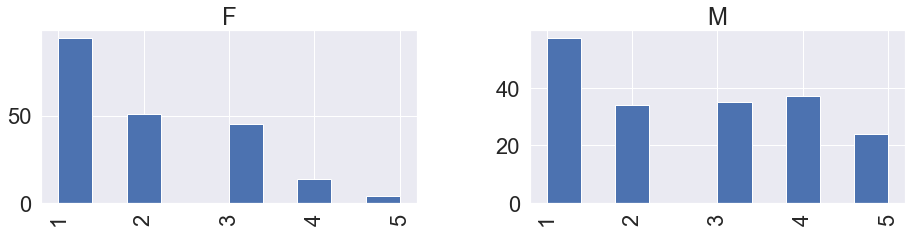

In [118]:
df_alc.hist('Walc', by='sex', layout=[2,2], figsize = [15,8]);

- среди пьющих и много пьющих обучающихся больше лиц мужского пола
- среди всех учеников преобладают мало пьющие.

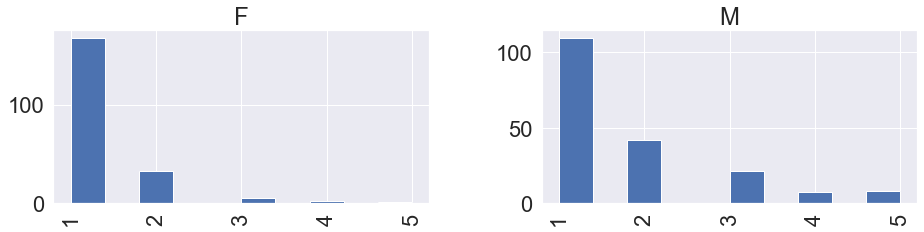

In [117]:
df_alc.hist('Dalc', by='sex', layout=[2,2], figsize = [15,8]);

- большинство обучающихся пьют очень мало, при этом обучющихся мужского пола, пьющих средне-очень сильно больше

Зависимость пропусков от употребления алкоголя по выходным:

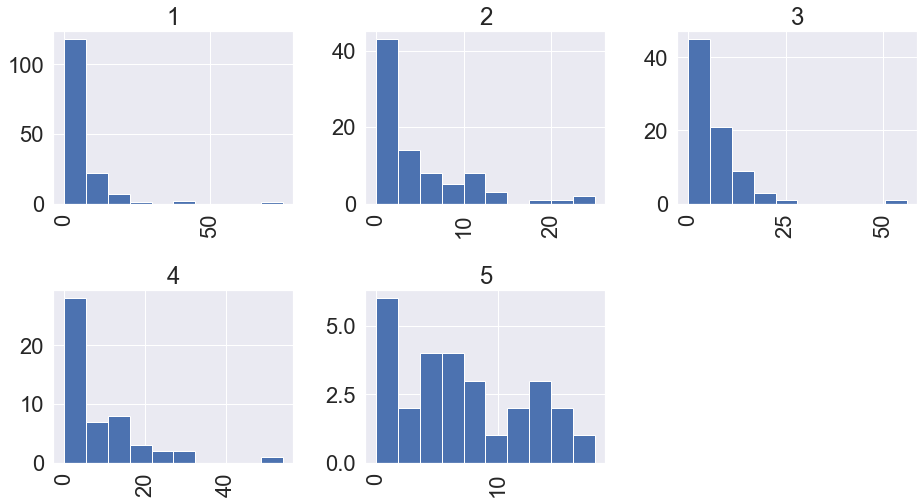

In [115]:
df_alc.hist('absences', by='Walc', layout = [2, 3], figsize = [15,8]);

- Употребление алкоголя не влияет на количество пропусков

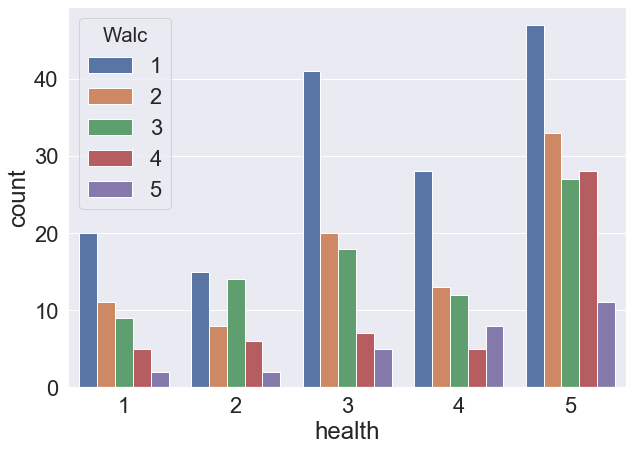

In [113]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.health,hue=df_alc.Walc)

- количество выпитого алкоголя не влияет на здоровье обучающихся

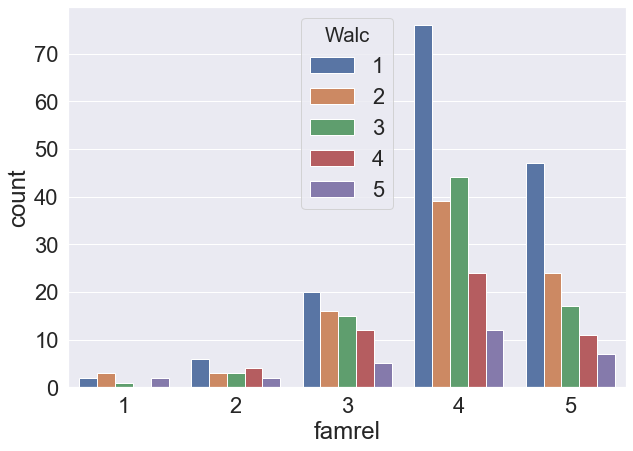

In [111]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.famrel,hue=df_alc.Walc)

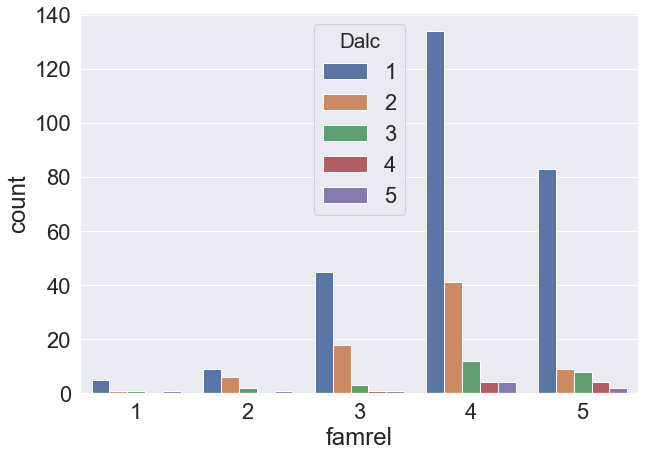

In [112]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.famrel,hue=df_alc.Dalc)

- в семьях с хорошими взаимоотношениями пьют не меньше, чем с плохими

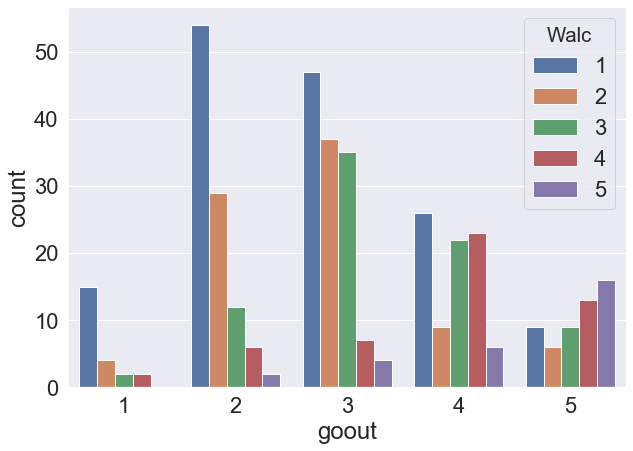

In [110]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.goout,hue=df_alc.Walc);

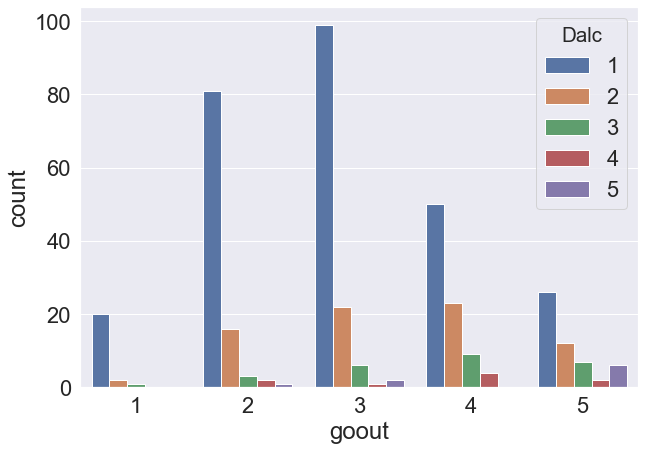

In [105]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.goout,hue=df_alc.Dalc);

- чем больше обучающиеся проводят время на улице с друзьями, тем больше они пьют

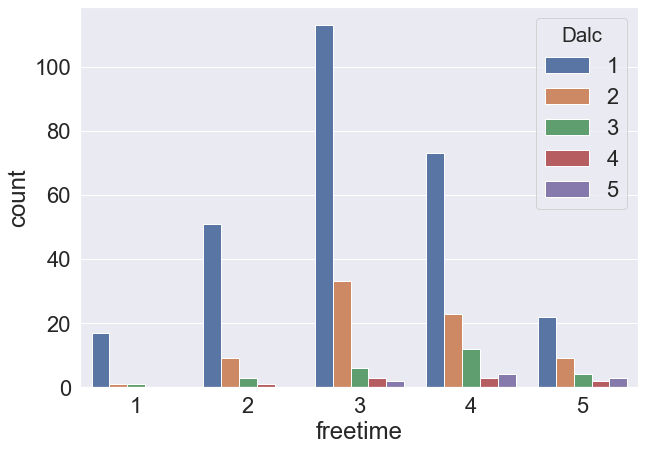

In [108]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.freetime,hue=df_alc.Dalc);

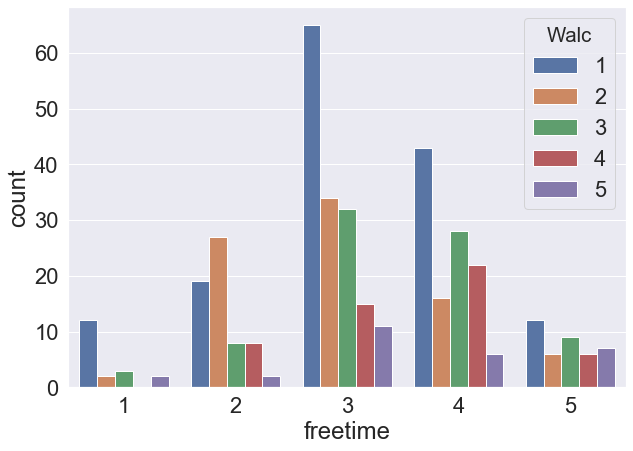

In [116]:
plt.figure(figsize=(10,7))
sns.countplot(x=df_alc.freetime,hue=df_alc.Walc);

- с увеличением свободного времени, в процентном соотношении увеличивается доля пьющих средне-очень много.

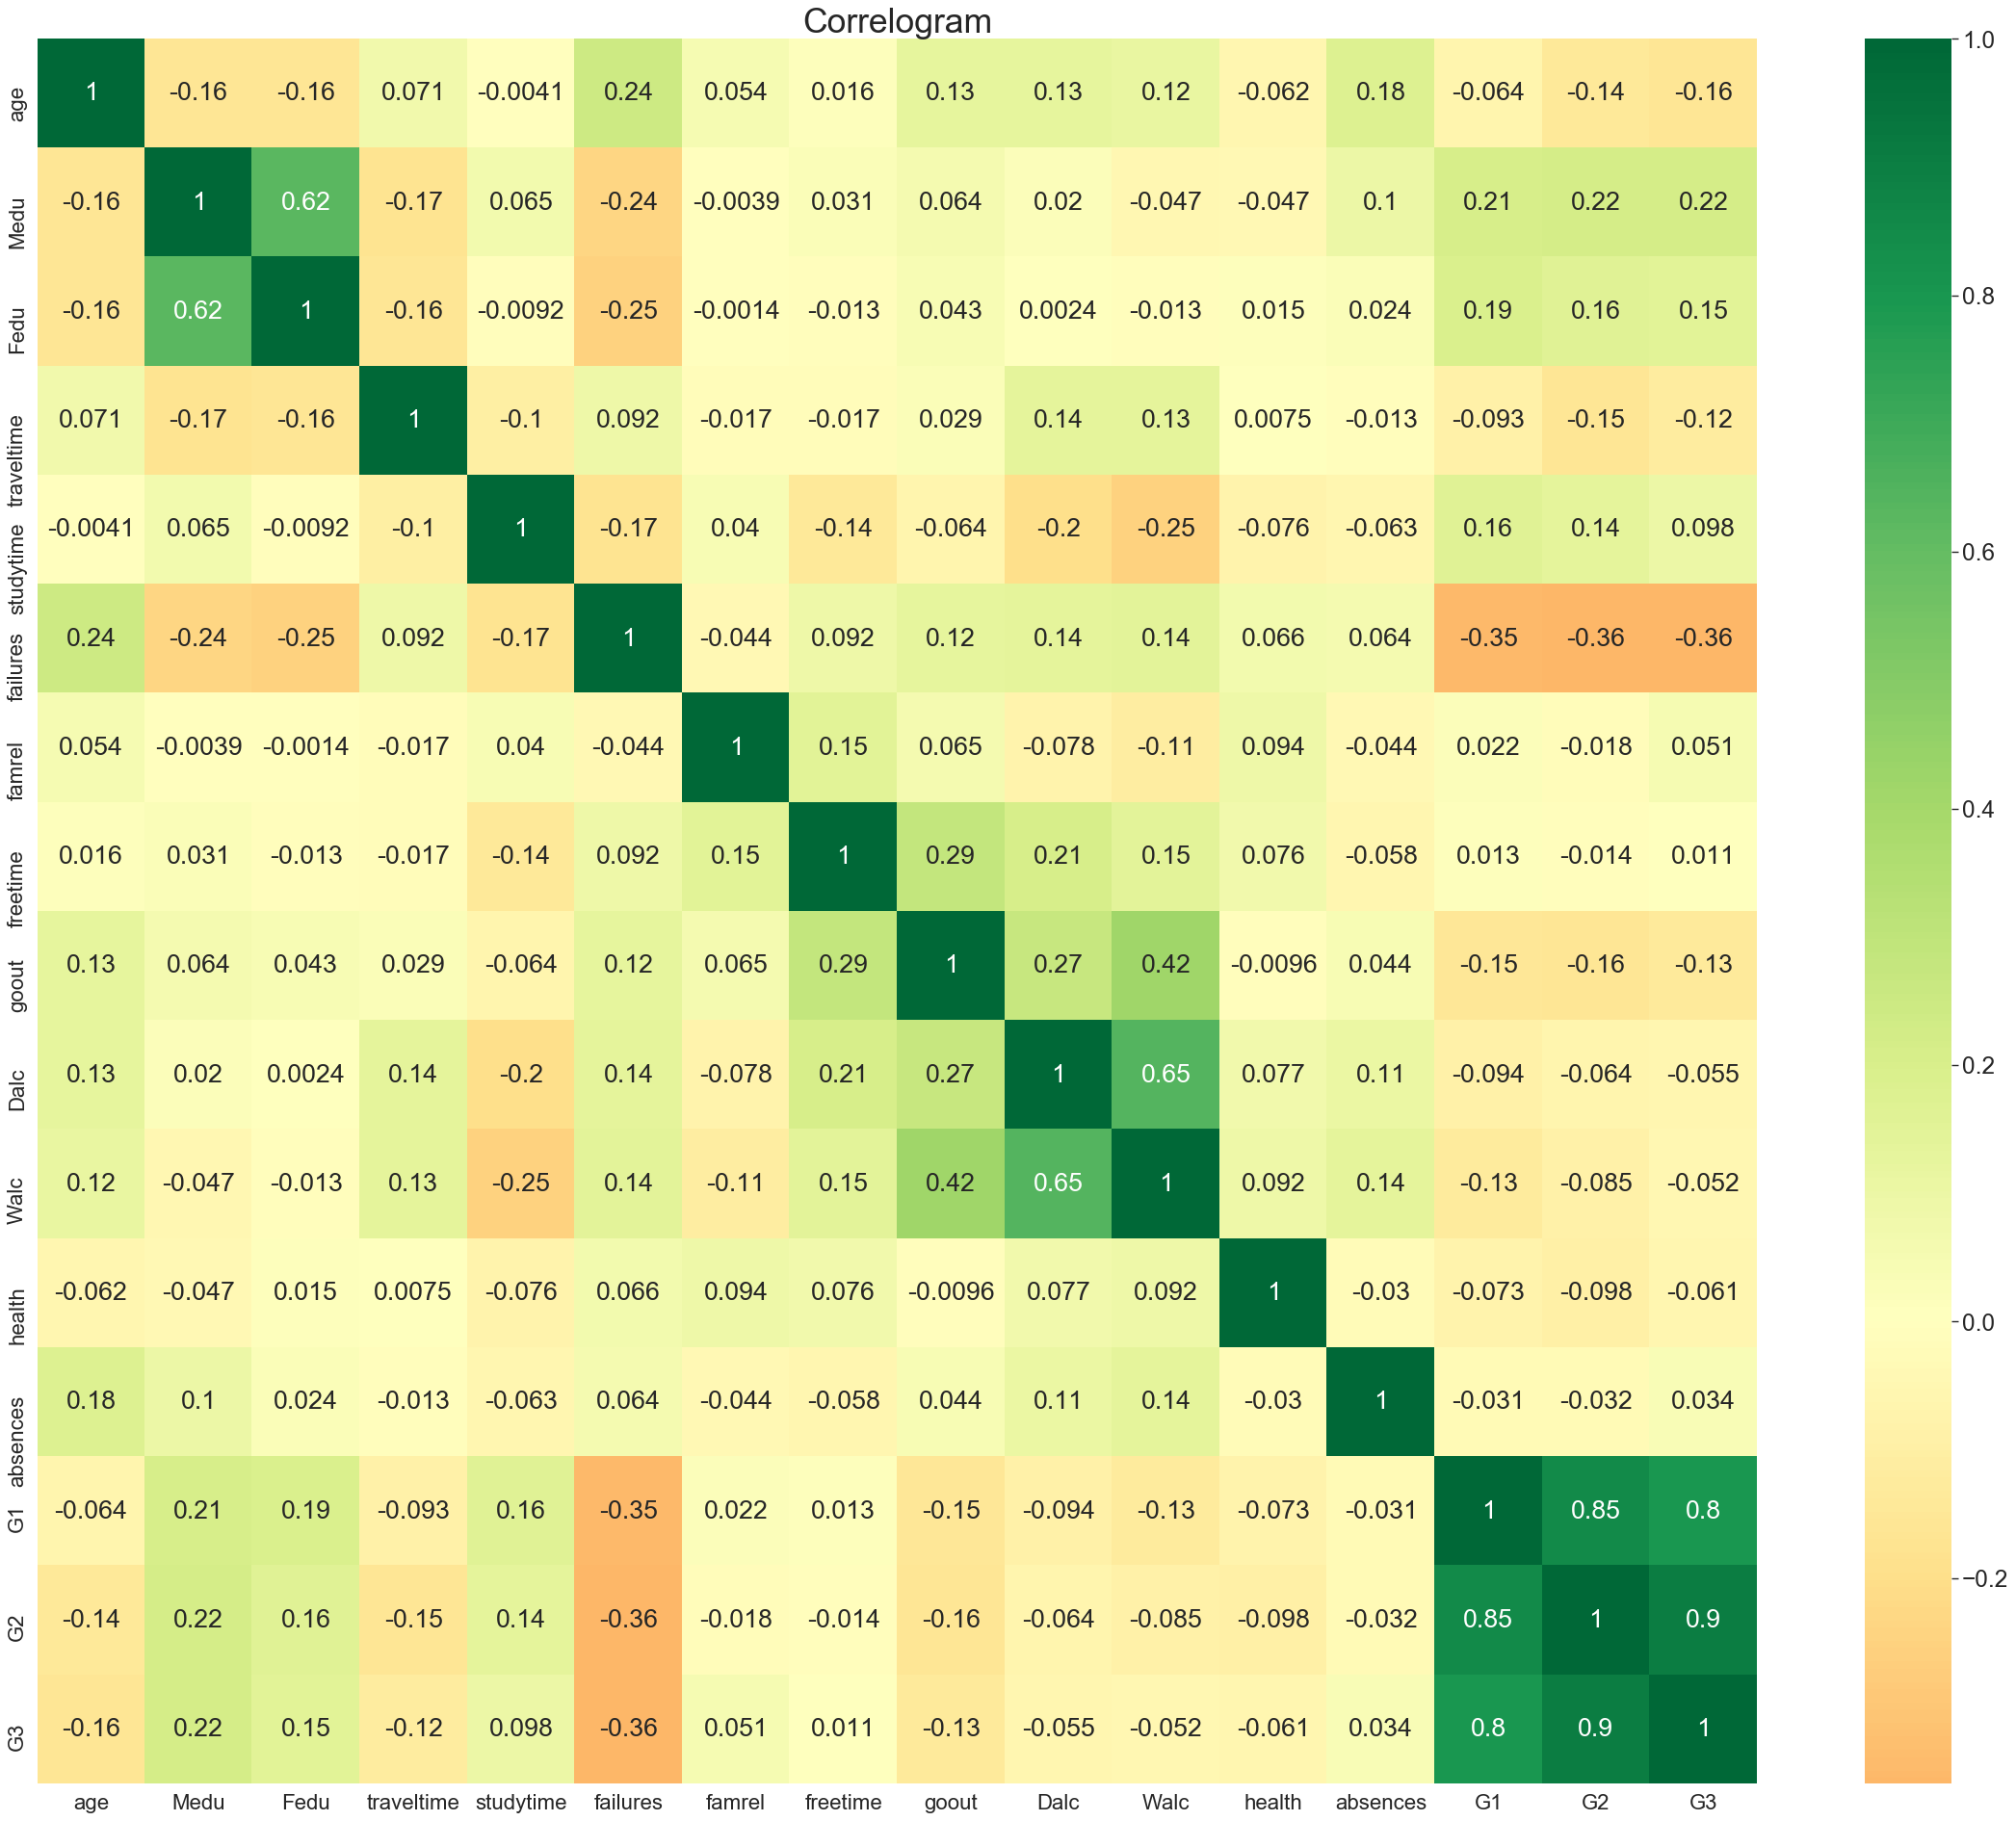

In [143]:
# Plot
plt.figure(figsize=(36,30), dpi= 80)
sns.heatmap(df_alc.corr(), xticklabels=df_alc.corr().columns, yticklabels=df_alc.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=32)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- По данной матрице можно сделать следующие выводы:
 - Увеличение количества провалов за прошлые курсы влечет уменьшение оценок (очевидный факт)
 - Количество потребляемого алкоголя и время, потраченное на учебу, обратно пропорциональны
 - количество пропусков и провалом имеют слабую прямо пропорциональную связь с возрастом учащихся
 - уроввень образования отца и матери прямо пропорционально связан с качеством оценок и обратно пропорционально с количеством провалов
 - уровень образования отца прямо пропорционально связан с уровнем образования матери
 - потребление алкоголя имеет прямо пропорциональную связь с количеством времени, проведенного с друзьями (что было обнаружено немного раньше)

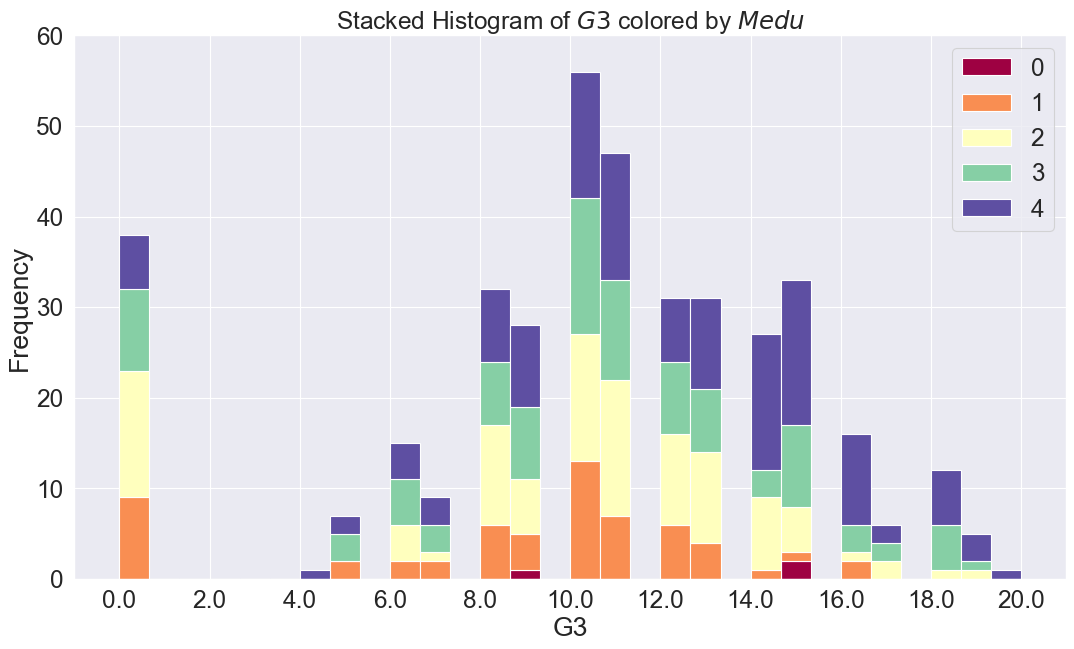

In [182]:
x_var = 'G3'
groupby_var = 'Medu'
df_agg = df_alc.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df_alc[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 60)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

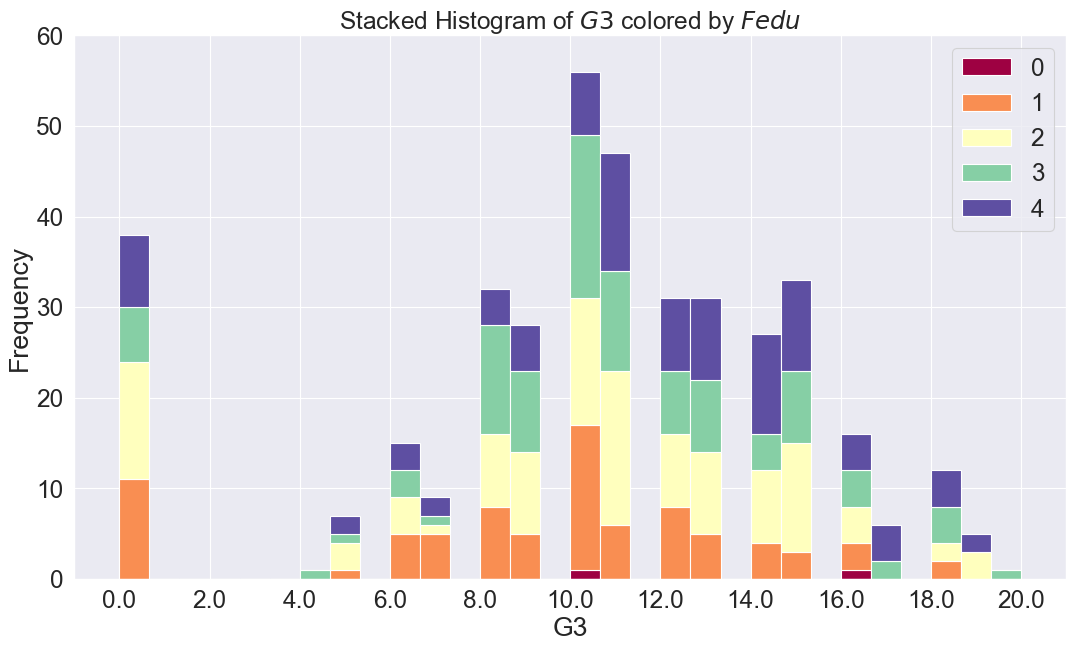

In [183]:
x_var = 'G3'
groupby_var = 'Fedu'
df_agg = df_alc.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df_alc[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 60)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

- Хорошие оценки чаще получают учащиеся, у которых лучше образование родителей